# Gestion de Nulos:

In [85]:
import pandas as pd
import numpy as np


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

*** existen duplicados en numero de empleados ***

- antes de trabajar los nulos tengo que quitar esos duplicados para que no distorsionen lasa estadisticas.

In [86]:
df_original = pd.read_csv("cleaned_data.csv", index_col=0) # o la ruta completa si está en una carpeta

In [87]:
df_original.columns

Index(['employee_turnover', 'business_travel_frequency', 'daily_rate',
       'distance_from_home_km', 'education_level', 'education_field',
       'remove_column', 'employee_id', 'environmental_satisfaction_level',
       'gender', 'hourly_rate', 'job_involvement_level', 'job_level',
       'job_role', 'job_satisfaction_level', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'overtime_hours', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction_level', 'standard_work_hours',
       'stock_option_level', 'total_years_worked',
       'training_sessions_last_year', 'work_life_balance', 'years_at_company',
       'years_since_last_promotion', 'years_with_current_manager',
       'same_as_monthly_income', 'birth_year', 'annual_salary', 'remote_work'],
      dtype='object')

In [88]:
# elimino duplicados en la columna employee_id:

df = df_original.drop_duplicates("employee_id")

In [89]:
# reviso que ya no hayan duplicados.

df_original["employee_id"].duplicated().sum()


np.int64(64)

In [90]:
print("Filas antes:", df_original.shape[0])
print("Filas después:", df.shape[0])

Filas antes: 1678
Filas después: 1614


In [91]:
df.columns

Index(['employee_turnover', 'business_travel_frequency', 'daily_rate',
       'distance_from_home_km', 'education_level', 'education_field',
       'remove_column', 'employee_id', 'environmental_satisfaction_level',
       'gender', 'hourly_rate', 'job_involvement_level', 'job_level',
       'job_role', 'job_satisfaction_level', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'overtime_hours', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction_level', 'standard_work_hours',
       'stock_option_level', 'total_years_worked',
       'training_sessions_last_year', 'work_life_balance', 'years_at_company',
       'years_since_last_promotion', 'years_with_current_manager',
       'same_as_monthly_income', 'birth_year', 'annual_salary', 'remote_work'],
      dtype='object')

In [92]:
columnas_utiles = ["employee_turnover", "business_travel_frequency", "distance_from_home_km", "education_level", "environmental_satisfaction_level", "gender", "job_involvement_level", "job_level", 
                   "job_satisfaction_level", "marital_status",  "num_companies_worked", "overtime_hours", "percent_salary_hike", "standard_work_hours", "stock_option_level", 
                   "training_sessions_last_year", "years_at_company", "years_with_current_manager", "birth_year", "remote_work", "total_years_worked", "annual_salary", "work_life_balance"
]

df_filtrado = df[columnas_utiles]


In [93]:
df_original.shape


(1678, 36)

In [94]:
df_filtrado.shape # hay menos filas porque hemos eliminado los duplicados de employee_id

(1614, 23)

In [95]:
df_filtrado.head(3)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,...,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
age,,,,,,,,,,,,,,,,,,,,,
51,no,NaN,6.0,3,1.0,male,3,5,3,NaN,...,full time,0,5,20,15,1972,yes,NaN,195370.0,3.0
52,no,NaN,1.0,4,3.0,male,2,5,3,NaN,...,NaN,1,5,33,9,1971,yes,34.0,199990.0,3.0
42,no,travel_rarely,4.0,2,3.0,male,3,5,4,married,...,NaN,0,3,22,15,1981,yes,22.0,192320.0,NaN


In [96]:
df_filtrado.isnull().sum().sort_values(ascending=False)


business_travel_frequency           772
overtime_hours                      676
marital_status                      651
total_years_worked                  526
standard_work_hours                 338
annual_salary                       274
distance_from_home_km               192
work_life_balance                   108
environmental_satisfaction_level    100
job_satisfaction_level                0
job_level                             0
num_companies_worked                  0
job_involvement_level                 0
percent_salary_hike                   0
gender                                0
stock_option_level                    0
training_sessions_last_year           0
years_at_company                      0
years_with_current_manager            0
birth_year                            0
remote_work                           0
education_level                       0
employee_turnover                     0
dtype: int64

In [97]:
# para sacar solo las columnas que tienen nulos

df_filtrado.isnull().sum()[df_filtrado.isnull().sum() > 0]


business_travel_frequency           772
distance_from_home_km               192
environmental_satisfaction_level    100
marital_status                      651
overtime_hours                      676
standard_work_hours                 338
total_years_worked                  526
annual_salary                       274
work_life_balance                   108
dtype: int64

In [98]:
# saco solo los nulos en orden descendente:

df_filtrado.isnull().sum()[df_filtrado.isnull().sum() > 0].sort_values(ascending=False)


business_travel_frequency           772
overtime_hours                      676
marital_status                      651
total_years_worked                  526
standard_work_hours                 338
annual_salary                       274
distance_from_home_km               192
work_life_balance                   108
environmental_satisfaction_level    100
dtype: int64

In [99]:
# vemos de que tipo es cada columna que tiene nulos:

df_filtrado[["business_travel_frequency", "overtime_hours", "marital_status", "total_years_worked", "standard_work_hours","annual_salary", "distance_from_home_km", "work_life_balance", "environmental_satisfaction_level"]].dtypes

business_travel_frequency            object
overtime_hours                       object
marital_status                       object
total_years_worked                  float64
standard_work_hours                  object
annual_salary                       float64
distance_from_home_km               float64
work_life_balance                   float64
environmental_satisfaction_level    float64
dtype: object

## columnas categoricas 

In [100]:
# Saco los valores unicos de las columnas categoricas:

columnas_categoricas = [
    "business_travel_frequency", 
    "overtime_hours", 
    "marital_status",
    "standard_work_hours" 
]

for col in columnas_categoricas:
    print(f"Valores únicos en '{col}':")
    print(df_filtrado[col].unique())
    print("\n")


Valores únicos en 'business_travel_frequency':
[nan 'travel_rarely' 'travel_frequently' 'non-travel']


Valores únicos en 'overtime_hours':
['no' nan 'yes']


Valores únicos en 'marital_status':
[nan 'married' 'divorced' 'single' 'marreid']


Valores únicos en 'standard_work_hours':
['full time' nan 'part time']




In [101]:
# sacamos el porcentaje de valores nulos de las columnas categoricas:

round((df_filtrado[["business_travel_frequency", "overtime_hours","marital_status", "standard_work_hours" ]].isnull().sum() /len(df_filtrado)) *100, 2)

# round((df_filtrado["overtime_hours"].isnull().sum() / df_filtrado.shape[0]) * 100, 2) - > tambien podemos hacerlo con shape

business_travel_frequency    47.83
overtime_hours               41.88
marital_status               40.33
standard_work_hours          20.94
dtype: float64

En las columnas "business_travel_frequency", "overtime_hours", "marital_status"  dejaremos los datos nulos como desconocdidos ya que es un porcentaje de nulos excesivamente alto.
Sin embargo, de la columna standard_work_hours, analizaremos los valores de la columna para rellenar los datos nulos.

In [102]:
# ahora trabajamos sobre "standard_work_hours"  ya que tiene un 20% de nulos para ver como los sustituimos:

df_filtrado["standard_work_hours"].describe().T

count          1276
unique            2
top       part time
freq            888
Name: standard_work_hours, dtype: object

In [103]:
# Para sacar los porcentajes de cada valor unico

round(df_filtrado["standard_work_hours"].value_counts(normalize=True, dropna=False) * 100, 2)

# con normalize = True, saca la proporcion, multiplico por 100 y tengo el porcentaje. 
# dropna = False para que incluya los valores nulos.

standard_work_hours
part time    55.02
full time    24.04
NaN          20.94
Name: proportion, dtype: float64

In [104]:
# estas columnas tienen mas de un 40% de valores nulos, los cuales los dejaremos como desconocido.
# para la columna "standard_work_hours", dejaremos los nulos tb como "Unknown" porque aun siendo un porcentaje inferior que las anteriores, no se puede establecer un parametro similar.
# para uno seria: df_filtrado["business_travel_frequency"] = df_filtrado["business_travel_frequency"].fillna("Unknown")


col_nulos_desconocido = [ "business_travel_frequency", "overtime_hours","marital_status", "standard_work_hours"]

for columna in col_nulos_desconocido:
    df_filtrado.loc[:, columna] = df_filtrado[columna].fillna("unknown") 

# al ser una copia de otro DF, necesito usar .loc para filtrar sino panda no entiende donde tiene que hacer el cambio.
# df_filtrado.loc[:, columna] accede a todas las filas (:) de la columan y las modifica directamente en el Dataframe original.



In [105]:
# comprobamos si ya no tienen nulos: 

round((df_filtrado[["business_travel_frequency", "overtime_hours","marital_status", "standard_work_hours"]].isnull().sum() /len(df_filtrado)) *100, 2)


business_travel_frequency    0.0
overtime_hours               0.0
marital_status               0.0
standard_work_hours          0.0
dtype: float64

## columnas numericas

In [106]:
# Saco los valores unicos de las columnas numericas:

columnas_numericas = [
    "total_years_worked",
    "annual_salary",
    "distance_from_home_km", 
    "work_life_balance",
    "environmental_satisfaction_level"
]

for col in columnas_numericas:
    print(f"Valores únicos en '{col}':")
    print(df_filtrado[col].unique())
    print("\n")

Valores únicos en 'total_years_worked':
[nan 34. 22. 28. 20. 21. 33. 40. 18. 25. 15. 17. 26. 16. 24. 14. 23. 27.
 19. 11. 38. 37. 13. 12. 29. 10. 36. 35.  9. 31. 32.  8.  7. 30.  6.  5.
  4.  3.  2.  1.  0.]


Valores únicos en 'annual_salary':
[195370.   199990.   192320.   171690.         nan 100071.84  53914.11
 165950.   199730.   134020.   132060.   195450.   180410.   192460.
 107480.   167520.    62010.   198450.    40010.   104470.   191324.62
 160640.    32100.   102660.   104750.    61620.    47210.   153407.07
  28111.13  46150.   169590.    54060.    59020.   108550.    59140.
  66460.   139730.    66870.    47350.   138720.   190450.    96130.
 115100.   170460.    36920.   198470.    23080.    57470.   104220.
  63470.    23480.    30720.   124900.    80200.   170680.    89430.
 192720.    55770.    26910.    74030.    88230.    35790.   177790.
 182130.   135770.   191900.   171230.   191870.    79880.    70830.
  34070.    29290.   120310.   154270.    51260.    96190. 

In [107]:
df_filtrado[["total_years_worked", "annual_salary", "distance_from_home_km", "work_life_balance", "environmental_satisfaction_level"]].isnull().sum() 

total_years_worked                  526
annual_salary                       274
distance_from_home_km               192
work_life_balance                   108
environmental_satisfaction_level    100
dtype: int64

In [108]:
round((df_filtrado[["total_years_worked", "annual_salary", "distance_from_home_km", "work_life_balance", "environmental_satisfaction_level"]].isnull().sum() / df_filtrado.shape[0]) * 100, 2)

total_years_worked                  32.59
annual_salary                       16.98
distance_from_home_km               11.90
work_life_balance                    6.69
environmental_satisfaction_level     6.20
dtype: float64

In [109]:
# calculamos la media, mediana, desviacion estandar....

df_filtrado[["total_years_worked", "annual_salary", "distance_from_home_km", "work_life_balance", "environmental_satisfaction_level"]].describe().T

,count,mean,std,min,25%,50%,75%,max
total_years_worked,1088.0,11.318934,7.727675,0.0,6.00,10.00,15.0,40.0
annual_salary,1340.0,65245.875313,45933.029687,10090.0,28111.13,53914.11,94607.5,199990.0
distance_from_home_km,1422.0,8.892405,7.920281,1.0,2.00,7.00,13.0,29.0
work_life_balance,1506.0,2.759628,0.702622,1.0,2.00,3.00,3.0,4.0
environmental_satisfaction_level,1514.0,2.714003,1.098326,1.0,2.00,3.00,4.0,4.0


In [110]:
# calculamos la moda de "total_years_worked", para ver como seria con una columna.

df_filtrado["total_years_worked"].mode()

0    10.0
Name: total_years_worked, dtype: float64

In [111]:
# para ver el numero de veces que sale la moda.

moda_years_worked = df_filtrado["total_years_worked"].mode()[0]
conteo_moda_years_worked = df_filtrado["total_years_worked"].value_counts()[moda_years_worked]

print(f"La moda es {moda_years_worked} y aparece {conteo_moda_years_worked} veces.")

La moda es 10.0 y aparece 144 veces.


In [112]:
# ahora hago lo mismo para todas las columnas numericas con valores nulos:

for col in columnas_numericas:
    moda = df_filtrado[col].mode()[0]  # Calcula la moda
    conteo = df_filtrado[col].value_counts()[moda]  # Cuántas veces aparece
    print(f"La moda de '{col}' es {moda} y aparece {conteo} veces.")
    print("--" *20)


La moda de 'total_years_worked' es 10.0 y aparece 144 veces.
----------------------------------------
La moda de 'annual_salary' es 53914.11 y aparece 261 veces.
----------------------------------------
La moda de 'distance_from_home_km' es 2.0 y aparece 217 veces.
----------------------------------------
La moda de 'work_life_balance' es 3.0 y aparece 913 veces.
----------------------------------------
La moda de 'environmental_satisfaction_level' es 4.0 y aparece 460 veces.
----------------------------------------


In [113]:
# voy a unir el describe() con la moda y la frecuencia para ver mas claro los datos y hacer la comparativa mejor.

# Paso 1: resumen estadístico con .describe().T
resumen = df_filtrado[columnas_numericas].describe().T #df describe() lo nombro resumen

# Paso 2: añado columnas de moda y su frecuencia
modas = []
frecuencias = []

for col in columnas_numericas: # calculo la moda y la frecuencia y lo añado a las listas vacias creadas en las lineas de arriba.
    moda = df_filtrado[col].mode()[0]
    frecuencia = df_filtrado[col].value_counts()[moda]
    
    modas.append(moda)
    frecuencias.append(frecuencia)

# Paso 3: añado al DataFrame resumen
resumen["moda"] = modas  # añado una nueva columna "moda" al DF llamado "resumen"
resumen["frecuencia_moda"] = frecuencias # lo mismo, añado una nueva columna llamada "frecuencias"

# Mostrar todo junto
resumen


,count,mean,std,min,25%,50%,75%,max,moda,frecuencia_moda
total_years_worked,1088.0,11.318934,7.727675,0.0,6.00,10.00,15.0,40.0,10.00,144
annual_salary,1340.0,65245.875313,45933.029687,10090.0,28111.13,53914.11,94607.5,199990.0,53914.11,261
distance_from_home_km,1422.0,8.892405,7.920281,1.0,2.00,7.00,13.0,29.0,2.00,217
work_life_balance,1506.0,2.759628,0.702622,1.0,2.00,3.00,3.0,4.0,3.00,913
environmental_satisfaction_level,1514.0,2.714003,1.098326,1.0,2.00,3.00,4.0,4.0,4.00,460


*** ANALISIS COLUMNA A COLUMNA DE LA CATEGORIA NUMERICA: ***

 - total_years_worked
    Media: 11.36
    Mediana (50%): 10.0
    Moda: 10.0 (151 veces)
    Nota: Muy clara concentración en la moda y no parece muy sesgada.
     Imputar con la moda: 10.0 (porque coincide con la mediana y es más frecuente)

-  annual_salary
    Media: 65.070 €
    Mediana: 53.914 €
    Moda: 53.914 € (270 veces)
    Nota: Hay outliers, ya que la media está muy por encima de la mediana y moda.
    Imputar con la mediana o moda: 53.914 €
    (la moda y la mediana coinciden, así que se puede usar cualquiera)

-  distance_from_home_km
    Media: 8.91
    Mediana: 7.0
    Moda: 2.0 (228 veces)
    Nota: Sesgo hacia distancias pequeñas (moda ≠ mediana)
    Imputar con la mediana: 7.0
    (la moda es demasiado pequeña en comparación con el resto)

-  work_life_balance
    Valores posibles: 1 a 4
    Moda: 3 (946 veces de 1564 aprox. 60%)
    Hay un orden lógico y se comporta como escala de satisfacción.
    Imputar con la moda: 3.0

- environmental_satisfaction_level
    Valores posibles: 1 a 4
    Moda: 4.0 (483 veces de 1576 aprox.30%) no domina claramente.
    Muy clara también.
    Imputar con la mediana: 3.0

In [114]:
# realizo la modificacion de los valores nulos en las columnas numericas segun analisis:

# creo un diccionario porque para hacer una imputacion manual, necesito asociar cada columan con su propio valor, por eso tiene que ser un dic.

valores_imputacion = {
    "total_years_worked": "moda",
    "annual_salary": "mediana",
    "distance_from_home_km": "mediana",
    "work_life_balance": "moda",
    "environmental_satisfaction_level": "mediana"
}



In [115]:
# Hago un bucle for que aplique la estadistica automaticamente:

for col, valores in valores_imputacion.items(): # recorre el diccionario, reviso el nombre de la columna y que valores usar
    if valores == "media":      # si el valor a imputar es la media 
        valor = df_filtrado[col].mean()  # calculo la media de esa columna
    elif valores == "mediana":      # si el valor a imputar es la mediana
        valor = df_filtrado[col].median()   # calculo la mediana de esa columna
    elif valores == "moda":     # si el valor a imputar es la moda 
        valor = df_filtrado[col].mode()[0]  # calculo la moda de la columna
    else:
          print(f"Aviso: valor desconocido para '{col}'. No se ha imputado nada.") 
          continue # para que no se detenga, printea el error y pasa a la siguiente columna
    
    df_filtrado.loc[:, col] = df_filtrado[col].fillna(valor)

# al ser una copia de otro DF, necesito usar .loc para filtrar sino panda no entiende donde tiene que hacer el cambio.
# df_filtrado.loc[:, columna] accede a todas las filas (:) de la columan y las modifica directamente en el Dataframe original.


In [116]:
# verifico que ya no hay nulos en las columnas imputadas.
df_filtrado[columnas_numericas].isnull().sum()


total_years_worked                  0
annual_salary                       0
distance_from_home_km               0
work_life_balance                   0
environmental_satisfaction_level    0
dtype: int64

In [117]:
# muestro los valores imputados para asegurarme que esta bien.

for col, valores in valores_imputacion.items():
    if valores == "media":
        valor = df_filtrado[col].mean()
    elif valores == "mediana":
        valor = df_filtrado[col].median()
    elif valores == "moda":
        valor = df_filtrado[col].mode()[0]
    else:
        print(f"Aviso: estrategia desconocida para '{col}'")
        continue
    
    print(f"{col} → Estrategia: {valores}, Valor imputado: {round(valor, 2)}")
    print("-" * 30 )

# .ljust(35) lo pongo para "alinear a la izquierda y rellenar con espacios hasta tener 35 caracteres"
# valores.ljust(8) lo pongo para lo mismo pero para la palabra media, moda o mediana.

total_years_worked → Estrategia: moda, Valor imputado: 10.0
------------------------------
annual_salary → Estrategia: mediana, Valor imputado: 53914.11
------------------------------
distance_from_home_km → Estrategia: mediana, Valor imputado: 7.0
------------------------------
work_life_balance → Estrategia: moda, Valor imputado: 3.0
------------------------------
environmental_satisfaction_level → Estrategia: mediana, Valor imputado: 3.0
------------------------------


In [118]:
df_filtrado.describe().T


,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


# visualizacion con simpleimputer, iterativeimputer o KNNImputer 

Text(0.5, 0, 'annual_salary')

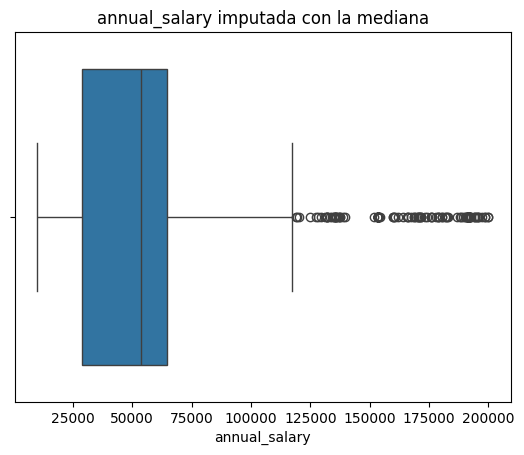

In [119]:
# SimpleImputer:

# 1. Copio solo la columna que quiero visualizar y hago una columna temporal porque ya los he cambiado manualmente:
columna = "annual_salary"
col_temp = df_filtrado[[columna]].copy()

# 2. Aplico SimpleImputer 
imp = SimpleImputer(strategy="median") # con simpleimputer rellenara con la mediana los valores nulos.
col_imputada = imp.fit_transform(col_temp)  # fit:calcula cual es la mediana de la columna y transform: aplica la mediana en lugar de los NaN

# 3. Visualizamos con boxplot
sns.boxplot(x=col_imputada.flatten())  # creo un grafico de bigotes con los valores imputados. y flatten: convierte el array de bidimensional a unidimenasional
plt.title(f"{columna} imputada con la mediana") # titulo dl grafico
plt.xlabel(columna) # eje x con el nombre de la columna 




*** ¿Que muestra este grafico ANNUAL_SALARY?: ***
- La caja central representa:
    -> El percentil 25% (Q1): borde izquierdo de la caja
    -> La mediana (Q2): línea dentro de la caja
    -> El percentil 75% (Q3): borde derecho de la caja
- Los (bigotes) muestran:
    -> El rango de valores normales (sin outliers)
- Los puntos sueltos fuera de los bigotes:
    -> Son los valores atípicos (outliers)
    -> En el caso de "annual_salary", existen seguramente algunos sueldos muy altos que se marcarán como outliers

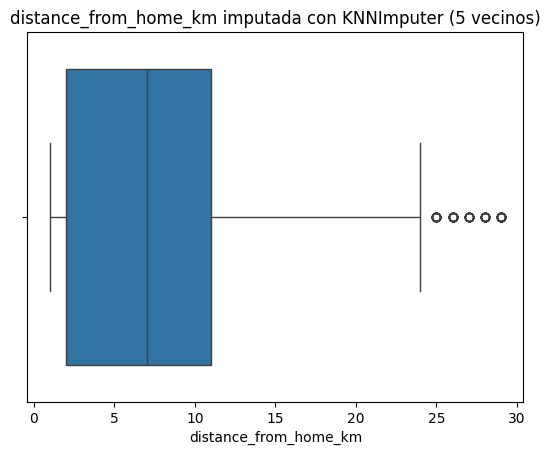

In [120]:
# KNNImputer: para imputar nulos usando vecinos mas cercanos.

# 1. la columna "distance_from_homr_km", hago una copia.
columna = "distance_from_home_km"
col_temp = df_filtrado[[columna]].copy()

# 2. Aplico imputación con KNN
imp = KNNImputer(n_neighbors=5)  # puedo ajustar el número de vecinos, aqui he escogido 5 vecinos.
col_imputada = imp.fit_transform(col_temp)  #  aprende que valores usar y transforma los datos, reemplazando los Nan con el promedio de sus vecinos.

# 3. Visualizo con boxplot
sns.boxplot(x=col_imputada.flatten())
plt.title(f"{columna} imputada con KNNImputer (5 vecinos)")
plt.xlabel(columna);




*** ¿Que muestra este grafico "distance_from_homr_km"?: ***
El gráfico muestra:
- La caja (de color):
    -> Rango intercuartílico (Q1 a Q3)
    -> Dentro estará la mediana (línea vertical)
- Bigotes:
    -> Rango de valores normales sin outliers
- Puntos sueltos fuera de los bigotes:
    -> Son los outliers: personas que viven a distancias muy diferentes (muy lejos o muy cerca del trabajo)

*** ¿Qué diferencia habrá con respecto a la imputación por mediana? ***
- La mediana reemplaza todos los NaN con el mismo valor fijo
- En cambio, KNN puede dar valores distintos según los vecinos de cada fila, lo cual mantiene más variabilidad
Por eso es posible que el gráfico con KNN sea más suav y con menos acumulación artificial en la mediana

Text(0.5, 0, 'total_years_worked')

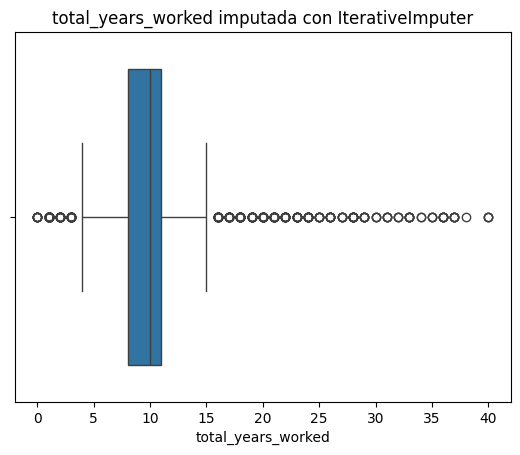

In [121]:
# IterativeImputer: usa un pequeño modelo predictivo para rellenar los Nan en base a las demas columnas:

# 1. Elijo la columna
columna = "total_years_worked"
col_temp = df_filtrado[[columna]].copy() # hago una copia para trabajar con ella y ver el grafico. doble corchete para que el resultado sea un DF y no una serie.

# 2. Aplicamos imputación con IterativeImputer
imp = IterativeImputer(random_state=42) # random_state=42: es solo para que los resultados sean reproducibles.
col_imputada = imp.fit_transform(col_temp)

# 3. Visualizamos con boxplot
sns.boxplot(x=col_imputada.flatten()) # calcula como imputar los valores basado en patrones en la columna y rellena los NaN segun un modelo estadistico.
plt.title(f"{columna} imputada con IterativeImputer")
plt.xlabel(columna)



*** ¿Que muestra este grafico "total_years_worked"?: ***

- La caja:
    -> Rango intercuartílico (Q1 a Q3)
    -> Línea de la mediana (valor central)
- Los bigotes:
    -> Rango esperado (sin valores atípicos)
- Puntos fuera de los bigotes:
    -> Son los outliers: personas que han trabajado muchos años más o menos de lo normal

Como IterativeImputer modela el valor que falta en función del resto de la columna (en este caso solo una), el resultado será más suave y estadísticamente coherente que simplemente rellenar con la mediana o con los vecinos.
*** Es posible que: ***
    - La mediana se mantenga parecida
    - Los valores imputados estén más repartidos
    - El gráfico se vea más natural

# COLUMNAS CATEGORICAS 

Los imputadores KNNImputer e IterativeImputer no funcionan directamente con columnas categóricas (porque trabajan con números).

La única opción directa es SimpleImputer con strategy="most_frequent" (moda).

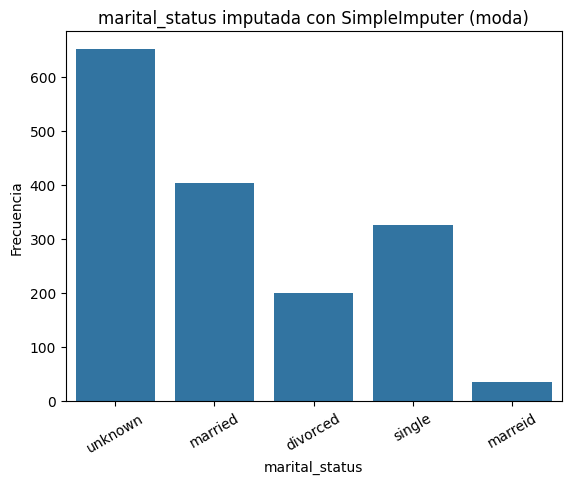

In [122]:
# SimpleImputer: con "marital_status"

# 1. Elijo la columna
columna = "marital_status"
col_temp = df_filtrado[[columna]].copy() # hago una copia porque lo he cambiado anteriormente a mano con codigo, asi no vuelvo a modificar el df.

# 2. Aplico imputación con la moda (más frecuente)
imp = SimpleImputer(strategy="most_frequent")
col_imputada = imp.fit_transform(col_temp) #fit_transform= encuentra el valor mas frecuente y rellena los NaN con ese valor. El resultado es un array con los valores ya imputados.

# 3. Visualizamos con gráfico de barras
col_df = pd.DataFrame(col_imputada, columns=[columna]) # convierte el array en un nuevo DF, y le vuelve a poner el nombre de la columna para que sea mas legible y facil de usar.

sns.countplot(x=columna, data=col_df)  # crea un grafico de barras: x= categorias de estado civil y= frecuencia 
plt.title(f"{columna} imputada con SimpleImputer (moda)")
plt.xlabel(columna)
plt.ylabel("Frecuencia")
plt.xticks(rotation=30); # gira un poco lasa etiquetas del eje para que no se ponga una encima de otra.

# Es un gráfico de barras con las categorías de "marital_status" ya sin NaN, imputadas con el valor más frecuente.


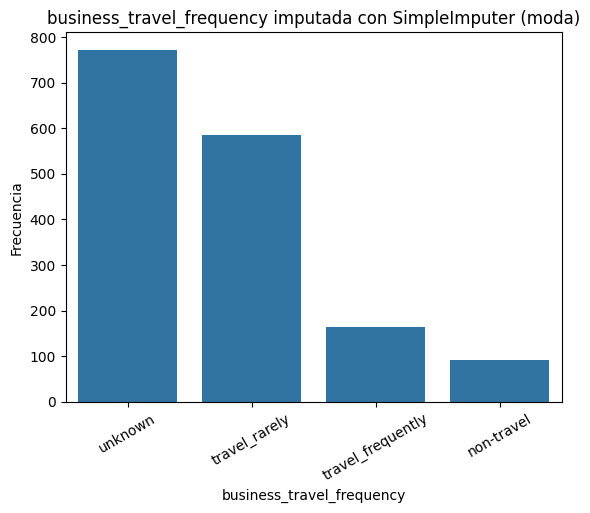

In [123]:
# SimpleImputer: con "business_travel_frequency"

# 1. Elijo la columna
columna = "business_travel_frequency"
col_temp = df_filtrado[[columna]].copy() # hago una copia porque lo he cambiado anteriormente a mano con codigo, asi no vuelvo a modificar el df.

# 2. Imputo con la moda (valor más frecuente)
imp = SimpleImputer(strategy="most_frequent")
col_imputada = imp.fit_transform(col_temp) #fit_transform= encuentra el valor mas frecuente y rellena los NaN con ese valor. El resultado es un array con los valores ya imputados.

# 3. Convertimos a DataFrame para graficar
col_df = pd.DataFrame(col_imputada, columns=[columna]) # convierte el array en un nuevo DF, y le vuelve a poner el nombre de la columna para que sea mas legible y facil de usar.

# 4. Gráfico de barras
sns.countplot(x=columna, data=col_df)   # crea un grafico de barras: x= categorias de estado civil y= frecuencia 
plt.title(f"{columna} imputada con SimpleImputer (moda)")
plt.xlabel(columna)
plt.ylabel("Frecuencia")
plt.xticks(rotation=30);  # gira un poco lasa etiquetas del eje para que no se ponga una encima de otra.

# Este gráfico de barras muestra cuántas personas viajan "Rarely", "Frequently", etc., ya con los nulos imputados con la moda.

In [124]:
# guardo el DataFrame filtrado ya limpio

df_filtrado.to_csv("df_filtrado_notnulls.csv", index=False)
